In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### <center> Задание. Генерация признаков и оценка их важности

1. Необходимо выбрать датасет, с которым будете работать.
2. Построить базовую модель (baseline) с исходными признаками
3. Сгенерировать новые признаки и провести анализ важности признаков, поэкспериментировать с признаками, чтобы добиться улучшения качества модели. Результаты экспериментов описать в виде комментариев
4. Поэкспериментировать с разными алгоритами (минимум 3), какой из алгоритмов покажет себя лучше всех. Результаты экспериментов описать в виде комментариев
5. Подготовить презентацию результатов экспериментов (просто в виде ноутбука, делать презентацию в PowerPoint не нужно)     

### Прогноз количества лайков

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
data.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [6]:
data['Tag'].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [7]:
df = data.copy()
df['Tag'] = df['Tag'].map({'a': 0, 'c': 1, 'r': 2, 'j': 3, 'p': 4, 's': 5, 'h': 6, 'o': 7, 'i': 8, 'x': 9})
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942.0,2.0,155623,7855.0,42.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0
3,96996,0,264.0,3.0,168793,27064.0,9.0
4,131465,1,4271.0,4.0,112223,13986.0,83.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  int64  
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 17.6 MB


In [9]:
df.shape

(330045, 7)

In [10]:
X = df[['Tag', 'Reputation', 'Answers', 'Username', 'Views']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

BaseLine = DecisionTreeRegressor(max_depth=5, random_state=17)
BaseLine.fit(X, y)

scores = cross_val_score(BaseLine, X, y, cv=kf, scoring='r2')

print("Точность на трейне: \n{}".format(r2_score(BaseLine.predict(X), y)))
print("Точность на кросс-валидации: \n{}".format(scores.mean()))

Точность на трейне: 
0.889948279060482
Точность на кросс-валидации: 
0.7934312635081405


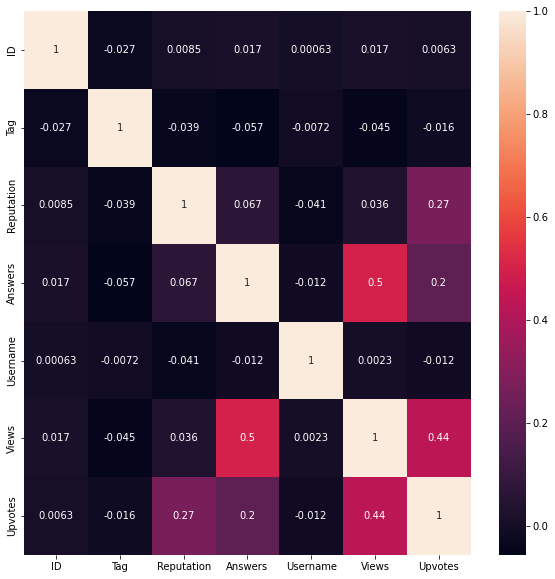

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

Сильнее всего количество лайков коррелирует с просмотрами.
Также, просмотры сильно коррелируют с ответами.

Далее посмотрим значимость признаков:

In [12]:
permutation = PermutationImportance(BaseLine,  scoring ='r2', n_iter=5, random_state=17).fit(X, y)
eli5.show_weights(permutation, feature_names=X.columns.tolist())

Weight,Feature
1.1849 ± 0.0919,Reputation
1.1641 ± 0.1006,Views
0.0182 ± 0.0101,Username
0.0151 ± 0.0155,Tag
0.0004 ± 0.0000,Answers


Решил посмотреть на признак Tag, которй играет не такую большую роль в модели.

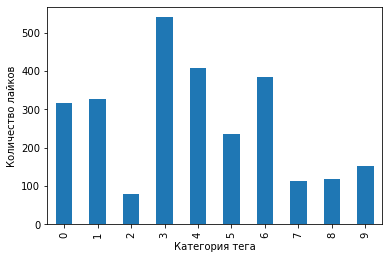

In [13]:
Tag_upvotes = df.groupby(['Tag'])[['Upvotes']].mean().reset_index()
Tag_upvotes['Upvotes'].plot(kind='bar');
plt.xlabel('Категория тега');
plt.ylabel('Количество лайков');

Можно увидеть, что теги можно сгруппировать:

In [14]:
df['Group_tag'] = df['Tag'].apply(lambda x: 0 if x in [2, 7, 8, 0] else (1 if x in [0, 1, 5] else 2))
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Group_tag
0,52664,0,3942.0,2.0,155623,7855.0,42.0,0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,1,1358.0,4.0,56177,8067.0,60.0,1
3,96996,0,264.0,3.0,168793,27064.0,9.0,0
4,131465,1,4271.0,4.0,112223,13986.0,83.0,1


In [15]:
X = df[['Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

BaseLine = DecisionTreeRegressor(max_depth=5, random_state=17)
BaseLine.fit(X, y)

scores = cross_val_score(BaseLine, X, y, cv=kf, scoring='r2')

print("Точность на трейне: \n{}".format(r2_score(BaseLine.predict(X), y)))
print("Точность на кросс-валидации: \n{}".format(scores.mean()))

Точность на трейне: 
0.889948279060482
Точность на кросс-валидации: 
0.8000233236029999


In [16]:
permutation = PermutationImportance(BaseLine,  scoring ='r2', n_iter=5, random_state=17).fit(X, y)
eli5.show_weights(permutation, feature_names=X.columns.tolist())

Weight,Feature
1.2469 ± 0.2427,Reputation
1.1388 ± 0.0293,Views
0.0316 ± 0.0097,Group_tag
0.0183 ± 0.0152,Username
0.0004 ± 0.0000,Answers
0 ± 0.0000,Tag


In [17]:
X = df[['Tag', 'Group_tag']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

BaseLine = DecisionTreeRegressor(max_depth=5, random_state=17)
BaseLine.fit(X, y)

scores = cross_val_score(BaseLine, X, y, cv=kf, scoring='r2')

print("Точность на трейне: \n{}".format(r2_score(BaseLine.predict(X), y)))
print("Точность на кросс-валидации: \n{}".format(scores.mean()))

permutation = PermutationImportance(BaseLine,  scoring ='r2', n_iter=5, random_state=17).fit(X, y)
eli5.show_weights(permutation, feature_names=X.columns.tolist())

Точность на трейне: 
-618.1328191223336
Точность на кросс-валидации: 
0.0015739518093582428


Weight,Feature
0.0030 ± 0.0002,Group_tag
0.0015 ± 0.0002,Tag


In [18]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

BaseLine = DecisionTreeRegressor(max_depth=5, random_state=17)
BaseLine.fit(X, y)

scores = cross_val_score(BaseLine, X, y, cv=kf, scoring='r2')

print("Точность на трейне: \n{}".format(r2_score(BaseLine.predict(X), y)))
print("Точность на кросс-валидации: \n{}".format(scores.mean()))

permutation = PermutationImportance(BaseLine,  scoring ='r2', n_iter=5, random_state=17).fit(X, y)
eli5.show_weights(permutation, feature_names=X.columns.tolist())

Точность на трейне: 
0.889948279060482
Точность на кросс-валидации: 
0.7921047979841311


Weight,Feature
1.1674 ± 0.1175,Reputation
1.1360 ± 0.1278,Views
0.0331 ± 0.0355,Group_tag
0.0072 ± 0.0078,Username
0 ± 0.0000,Answers


***Мысли:***

1) Сгруппировать пользователей по количеству лайков (если лайки в таком-то интервале, то занеси пользователей в одну группу).

2) Попробовать также разбить ответы на несколько разных групп.

3) Подозрительно сильно влияет параметр репутация на количество лайков. По логике, он значим, но, возможно, сильное влияние он оказывает из-за масштаба своих значений (максимальные значения > 1 млн).

In [19]:
User_upvotes = df.groupby(['Username'])[['Upvotes']].sum().reset_index()
User_upvotes.loc[100:300]

,Username,Upvotes
100,139,65.0
101,141,8.0
102,142,64.0
103,143,13.0
104,144,128.0
...,...,...
296,371,32.0
297,372,7247.0
298,374,18.0
299,375,9.0


*Возможно, это можно как-то использовать, но не придумал, как выделить это в отдельный столбец.*

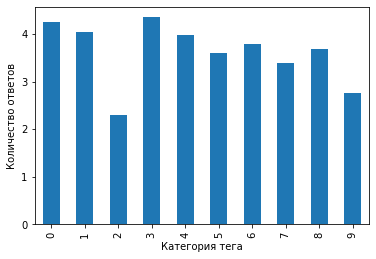

In [20]:
Tag_Answers = df.groupby(['Tag'])[['Answers']].mean().reset_index()
Tag_Answers['Answers'].plot(kind='bar');
plt.xlabel('Категория тега');
plt.ylabel('Количество ответов');

In [21]:
df['Answers'].unique()

array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55.])

In [22]:
Rep_Us_Up = df.groupby(['Reputation', 'Answers'])['Upvotes'].sum().reset_index()
Rep_Us_Up

,Reputation,Answers,Upvotes
0,0.0,0.0,110.0
1,0.0,1.0,10818.0
2,0.0,2.0,19607.0
3,0.0,3.0,20736.0
4,0.0,4.0,17244.0
...,...,...,...
85551,813374.0,1.0,2152.0
85552,1042428.0,4.0,16258.0
85553,1042428.0,5.0,50687.0
85554,1042428.0,10.0,24119.0


Попытался разбить признак репутация на несколько групп:

In [23]:
#df['Rep_segment'] = pd.cut(df['Reputation'], 5, labels=False)
#df.loc[100:200]

In [24]:
#X = df[['Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Group_tag', 'Rep_segment']]
#y = df['Upvotes']

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

#BaseLine = DecisionTreeRegressor(max_depth=5, random_state=17)
#BaseLine.fit(X, y)

#scores = cross_val_score(BaseLine, X, y, cv=kf, scoring='r2')

#print("Точность на трейне: \n{}".format(r2_score(BaseLine.predict(X), y)))
#print("Точность на кросс-валидации: \n{}".format(scores.mean()))

In [25]:
#permutation = PermutationImportance(BaseLine,  scoring ='r2', n_iter=5, random_state=17).fit(X, y)
#eli5.show_weights(permutation, feature_names=X.columns.tolist())

**Поэкспериментировать с разными алгоритами (минимум 3), какой из алгоритмов покажет себя лучше всех. Результаты экспериментов описать в виде комментариев**

Первым алгоритмом будет алгоритм Линейной регрессии.

In [26]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Tag']]
y = df['Upvotes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

LR = LinearRegression()
LR.fit(X, y)

cross_val_score(LR, X, y, cv=kf, scoring="r2").mean()

0.2550963061600488

In [27]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

LR_default = LinearRegression()
LR_default.fit(X, y)

cross_val_score(LR_default, X, y, cv=kf, scoring="r2").mean()

0.25512932830823754

*Не понял, почему такая маленькая точность...*

Далее решил воспользоваться алгоритмами деревьев решений. Для начала применил RandomForestRegressor:

In [28]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Tag']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_default =  RandomForestRegressor(n_estimators=10, random_state=1)
model_default.fit(X, y)

cross_val_score(model_default, X, y, cv=kf, scoring="r2").mean()

0.844512818785565

In [29]:
from sklearn.ensemble import RandomForestRegressor

x = df[['Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model =  RandomForestRegressor(n_estimators=10, random_state=1)
model.fit(x, y)

cross_val_score(model, x, y, cv=kf, scoring="r2").mean()

0.8380873913595683

*Качество модели с сгруппированным тегом ухудшилось.*

Далее применим алгоритм дерева регрессии:

In [30]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Reputation', 'Answers', 'Username', 'Views', 'Tag']]
y = df['Upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Reg_tree_default = DecisionTreeRegressor(max_depth=5, random_state=17)

Reg_tree_default.fit(X_train, y_train)

cross_val_score(Reg_tree_default, X, y, cv=kf, scoring="r2").mean()

0.7973344805481741

In [31]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

Reg_tree.fit(X_train, y_train)

cross_val_score(Reg_tree, X, y, cv=kf, scoring="r2").mean()

0.7921047979841311

*Как можно заметить, здесь группировка тега привела к незначительному ухудшению модели.*

Следующим алгоритмом стал метод К-ближайших соседей:

In [32]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Tag']]
y = df['Upvotes']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

KNR_default = KNeighborsRegressor()
KNR_model_default = KNR_default.fit(X, y)
cross_val_score(KNR_default, X, y, cv=kf, scoring="r2").mean()

0.6914229633863397

In [33]:
X = df[['Reputation', 'Answers', 'Username', 'Views', 'Group_tag']]
y = df['Upvotes']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

KNR = KNeighborsRegressor()
KNR_model = KNR.fit(X, y)
cross_val_score(KNR, X, y, cv=kf, scoring="r2").mean()

0.6914235413942823

Можно увидеть, что качество модели с новым признаком незначительно улучшилось

**Вывод: лучше всего проявил себя алгоритм случайного леса.**